In [75]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
# data = "x_col_new_all_comb_15_c.csv"
# df=pd.read_csv(data)

In [77]:
# def round_values(df, columns, decimal_places=1):
#     for column in columns:
#         df[column] = df[column].round(decimal_places)
#     return df

# columns_to_round = ['Sensitivity (Health Facility)', 'Sensitivity (Caesarean)', 'Sensitivity (Leprosy Female)', 'Sensitivity (TB Female)']
# df = round_values(df, columns_to_round)

In [78]:
# df.to_csv(data,index=False)

In [13]:
df=pd.read_excel("mmdCaseFile.xlsx")

In [3]:
df

,District,KGISDist 1,NFHS_%BirthsDeliveredInAHealthFacility,NFHS_%BirthsDeliveredByCaesareanSection,Identified_Leprosy_Patients_Female_700,Death_TB_Patients_Female_712,MaternalMortalityDeath_721
0,BENGALURU,Bengaluru,96.2,27.5,92,91,19
1,BENGALURU(R),Bengaluru(R),98.5,30.5,4,20,8
2,RAMANAGARA,Ramanagara,99.3,27.3,18,21,4
3,CHITRADURGA,Chitradurga,95.6,28.1,22,15,15
4,DAVANAGERE,Davanagere,97.7,27.7,25,10,23
5,KOLAR,Kolar,96.5,31.8,19,29,17
6,CHIKKABALLAPURA,Chikkaballapura,91.6,25.1,31,21,12
7,SHIVAMOGGA,Shivamogga,97.9,31.3,13,8,27
8,TUMAKURU,Tumakuru,96.4,33.4,32,68,23
9,CHIKKAMAGALURU,Chikkamagaluru,96.2,40.3,3,8,8


In [4]:
df.columns

Index(['District', 'KGISDist 1', 'NFHS_%BirthsDeliveredInAHealthFacility',
       'NFHS_%BirthsDeliveredByCaesareanSection',
       'Identified_Leprosy_Patients_Female_700',
       'Death_TB_Patients_Female_712', 'MaternalMortalityDeath_721'],
      dtype='object')

In [5]:
x_col=df.columns[2:-1]
x_col

Index(['NFHS_%BirthsDeliveredInAHealthFacility',
       'NFHS_%BirthsDeliveredByCaesareanSection',
       'Identified_Leprosy_Patients_Female_700',
       'Death_TB_Patients_Female_712'],
      dtype='object')

In [6]:
y=df['MaternalMortalityDeath_721']

In [7]:
x=df[x_col]
x

,NFHS_%BirthsDeliveredInAHealthFacility,NFHS_%BirthsDeliveredByCaesareanSection,Identified_Leprosy_Patients_Female_700,Death_TB_Patients_Female_712
0,96.2,27.5,92,91
1,98.5,30.5,4,20
2,99.3,27.3,18,21
3,95.6,28.1,22,15
4,97.7,27.7,25,10
5,96.5,31.8,19,29
6,91.6,25.1,31,21
7,97.9,31.3,13,8
8,96.4,33.4,32,68
9,96.2,40.3,3,8


In [8]:
alpha_BirthsDeliveredInAHealthFacility=float(input("Enter Sensitivity for BirthsDeliveredInAHealthFacility"))
if alpha_BirthsDeliveredInAHealthFacility<0:
    alpha_BirthsDeliveredInAHealthFacility=0
elif alpha_BirthsDeliveredInAHealthFacility>1:
  alpha_BirthsDeliveredInAHealthFacility=1

ValueError: could not convert string to float: ''

In [ ]:
alpha_BirthsDeliveredByCaesareanSection=float(input("Enter Sensitivity for BirthsDeliveredByCaesareanSection"))
if alpha_BirthsDeliveredByCaesareanSection<0:
    alpha_BirthsDeliveredByCaesareanSection=0
elif alpha_BirthsDeliveredByCaesareanSection>1:
  alpha_BirthsDeliveredByCaesareanSection=1

In [ ]:
alpha_Identified_Leprosy_Patients_Female=float(input("Enter Sensitivity for Identified_Leprosy_Patients_Female"))
if alpha_Identified_Leprosy_Patients_Female<0:
    alpha_Identified_Leprosy_Patients_Female=0
elif alpha_Identified_Leprosy_Patients_Female>1:
  alpha_Identified_Leprosy_Patients_Female=1

In [ ]:
alpha_Death_TB_Patients_Female=float(input("Enter Sensitivity for Death_TB_Patients_Female"))
if alpha_Death_TB_Patients_Female<0:
    alpha_Death_TB_Patients_Female=0
elif alpha_Death_TB_Patients_Female>1:
  alpha_Death_TB_Patients_Female=1

In [ ]:
alpha=[alpha_BirthsDeliveredInAHealthFacility,alpha_BirthsDeliveredByCaesareanSection,
       alpha_Identified_Leprosy_Patients_Female,alpha_Death_TB_Patients_Female]
alpha=np.array(alpha)
alpha

array([0., 0., 0., 0.])

In [ ]:
y

0     19
1      8
2      4
3     15
4     23
5     17
6     12
7     27
8     23
9      8
10     8
11     7
12    22
13     6
14     9
15    20
16     3
17    52
18    21
19    19
20    68
21     7
22    14
23     4
24    33
25    17
26    52
27    16
28    50
29    18
Name: MaternalMortalityDeath_721, dtype: int64

In [ ]:
x=sm.add_constant(x)
x

,const,NFHS_%BirthsDeliveredInAHealthFacility,NFHS_%BirthsDeliveredByCaesareanSection,Identified_Leprosy_Patients_Female_700,Death_TB_Patients_Female_712
0,1.0,96.2,27.5,92,91
1,1.0,98.5,30.5,4,20
2,1.0,99.3,27.3,18,21
3,1.0,95.6,28.1,22,15
4,1.0,97.7,27.7,25,10
5,1.0,96.5,31.8,19,29
6,1.0,91.6,25.1,31,21
7,1.0,97.9,31.3,13,8
8,1.0,96.4,33.4,32,68
9,1.0,96.2,40.3,3,8


In [ ]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     MaternalMortalityDeath_721   R-squared:                       0.318
Model:                                    OLS   Adj. R-squared:                  0.209
Method:                         Least Squares   F-statistic:                     2.914
Date:                        Sat, 10 Feb 2024   Prob (F-statistic):             0.0416
Time:                                11:34:14   Log-Likelihood:                -119.74
No. Observations:                          30   AIC:                             249.5
Df Residuals:                              25   BIC:                             256.5
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      59.3737     67.921      0.874      0.390     -80.512     199.260
NFHS_%BirthsDeliveredInAHealthFacility     -0.4041      0.749     -0.540      0.594      -1.946       1.138
NFHS_%BirthsDeliveredByCaesareanSection    -0.3539      0.362     -0.978      0.337      -1.099       0.391
Identified_Leprosy_Patients_Female_700      0.0974      0.116      0.843      0.407      -0.141       0.335
Death_TB_Patients_Female_712                0.1620      0.141      1.152      0.260      -0.128       0.452
==============================================================================
Omnibus:                       16.883   Durbin-Watson:                   2.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.294
Skew:                           1.470   Prob(JB):                     3.92e-05
Kurtosis:                       5.755   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y.sum()
y.mean()

20.066666666666666

In [ ]:
target=int(input("Enter the Target Maternal Deaths "))

In [ ]:
coef=model.params.values[1:]
coef

array([-0.40406349, -0.35391875,  0.09743996,  0.16202914])

In [ ]:
target

10

In [ ]:
x.drop('const',axis=1,inplace=True)

In [ ]:
x

,NFHS_%BirthsDeliveredInAHealthFacility,NFHS_%BirthsDeliveredByCaesareanSection,Identified_Leprosy_Patients_Female_700,Death_TB_Patients_Female_712
0,96.2,27.5,92,91
1,98.5,30.5,4,20
2,99.3,27.3,18,21
3,95.6,28.1,22,15
4,97.7,27.7,25,10
5,96.5,31.8,19,29
6,91.6,25.1,31,21
7,97.9,31.3,13,8
8,96.4,33.4,32,68
9,96.2,40.3,3,8


In [ ]:
x_new =(x-alpha*(y.sum()-target)/coef)
x_new=sm.add_constant(x_new)
x_new

,const,NFHS_%BirthsDeliveredInAHealthFacility,NFHS_%BirthsDeliveredByCaesareanSection,Identified_Leprosy_Patients_Female_700,Death_TB_Patients_Female_712
0,1.0,96.2,27.5,92.0,91.0
1,1.0,98.5,30.5,4.0,20.0
2,1.0,99.3,27.3,18.0,21.0
3,1.0,95.6,28.1,22.0,15.0
4,1.0,97.7,27.7,25.0,10.0
5,1.0,96.5,31.8,19.0,29.0
6,1.0,91.6,25.1,31.0,21.0
7,1.0,97.9,31.3,13.0,8.0
8,1.0,96.4,33.4,32.0,68.0
9,1.0,96.2,40.3,3.0,8.0


In [ ]:
def clip(col):

  return np.clip(col,0,100)

x_new=x_new.apply(clip)
x_new

,const,NFHS_%BirthsDeliveredInAHealthFacility,NFHS_%BirthsDeliveredByCaesareanSection,Identified_Leprosy_Patients_Female_700,Death_TB_Patients_Female_712
0,1.0,96.2,27.5,92.0,91.0
1,1.0,98.5,30.5,4.0,20.0
2,1.0,99.3,27.3,18.0,21.0
3,1.0,95.6,28.1,22.0,15.0
4,1.0,97.7,27.7,25.0,10.0
5,1.0,96.5,31.8,19.0,29.0
6,1.0,91.6,25.1,31.0,21.0
7,1.0,97.9,31.3,13.0,8.0
8,1.0,96.4,33.4,32.0,68.0
9,1.0,96.2,40.3,3.0,8.0


In [ ]:

y_new=x_new.dot(model.params.values)
y_new

0     34.479165
1     12.409277
2     14.744755
3     15.374240
4     14.149448
5     15.677171
6     19.901384
7     11.301190
8     22.737164
9      7.828430
10    14.834928
11     5.967314
12    10.402846
13    11.414383
14     9.798168
15    12.666988
16    19.534659
17    38.659271
18    24.779629
19    20.063707
20    22.867544
21    19.809878
22    19.378240
23    22.362380
24    34.911806
25    23.779908
26    25.644064
27    25.669117
28    39.056261
29    27.509327
dtype: float64

In [ ]:
y_new=np.clip(y_new,0,700)
y_new

0     34.479165
1     12.409277
2     14.744755
3     15.374240
4     14.149448
5     15.677171
6     19.901384
7     11.301190
8     22.737164
9      7.828430
10    14.834928
11     5.967314
12    10.402846
13    11.414383
14     9.798168
15    12.666988
16    19.534659
17    38.659271
18    24.779629
19    20.063707
20    22.867544
21    19.809878
22    19.378240
23    22.362380
24    34.911806
25    23.779908
26    25.644064
27    25.669117
28    39.056261
29    27.509327
dtype: float64

In [ ]:
y_new.mean()

19.923754728765502

In [ ]:
x_new.mean()

const                                       1.000000
NFHS_%BirthsDeliveredInAHealthFacility     94.556667
NFHS_%BirthsDeliveredByCaesareanSection    24.633333
Identified_Leprosy_Patients_Female_700     34.866667
Death_TB_Patients_Female_712               25.166667
dtype: float64

In [ ]:
x_new.drop('const',axis=1,inplace=True)

In [ ]:
x_new=x_new.melt()
x_new

,variable,value
0,NFHS_%BirthsDeliveredInAHealthFacility,96.2
1,NFHS_%BirthsDeliveredInAHealthFacility,98.5
2,NFHS_%BirthsDeliveredInAHealthFacility,99.3
3,NFHS_%BirthsDeliveredInAHealthFacility,95.6
4,NFHS_%BirthsDeliveredInAHealthFacility,97.7
...,...,...
115,Death_TB_Patients_Female_712,11.0
116,Death_TB_Patients_Female_712,12.0
117,Death_TB_Patients_Female_712,20.0
118,Death_TB_Patients_Female_712,56.0


In [ ]:
x_new['type']="new"

In [ ]:
x=x.melt()
x

,variable,value
0,NFHS_%BirthsDeliveredInAHealthFacility,96.2
1,NFHS_%BirthsDeliveredInAHealthFacility,98.5
2,NFHS_%BirthsDeliveredInAHealthFacility,99.3
3,NFHS_%BirthsDeliveredInAHealthFacility,95.6
4,NFHS_%BirthsDeliveredInAHealthFacility,97.7
...,...,...
115,Death_TB_Patients_Female_712,11.0
116,Death_TB_Patients_Female_712,12.0
117,Death_TB_Patients_Female_712,20.0
118,Death_TB_Patients_Female_712,56.0


In [ ]:
x['type']="old"

In [ ]:
res_df= pd.concat([x,x_new])

In [ ]:
res_df

,variable,value,type
0,NFHS_%BirthsDeliveredInAHealthFacility,96.2,old
1,NFHS_%BirthsDeliveredInAHealthFacility,98.5,old
2,NFHS_%BirthsDeliveredInAHealthFacility,99.3,old
3,NFHS_%BirthsDeliveredInAHealthFacility,95.6,old
4,NFHS_%BirthsDeliveredInAHealthFacility,97.7,old
...,...,...,...
115,Death_TB_Patients_Female_712,11.0,new
116,Death_TB_Patients_Female_712,12.0,new
117,Death_TB_Patients_Female_712,20.0,new
118,Death_TB_Patients_Female_712,56.0,new


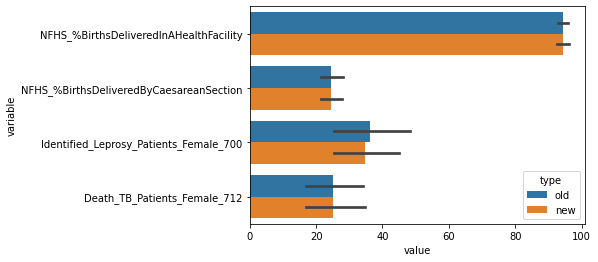

In [ ]:

sns.barplot(x="value",y="variable",data=res_df,hue="type",orient='h')
plt.show()

In [ ]:
y_pred=y_new.mean()
if y_new.mean()<0:
  y_pred=0

In [ ]:
y_pred

19.923754728765502

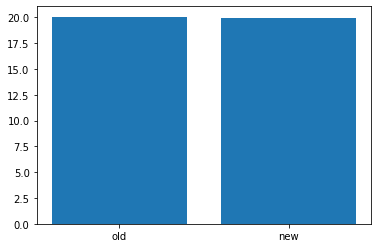

In [ ]:
plt.bar(["old","new"],[y.mean(),y_pred] )
plt.show()